In [332]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from datetime import datetime, date, time

## Data clean

In [4]:
df = pd.read_excel(r"C:\Users\Roman Shypka\OneDrive\Робочий стіл\csv_car.xlsx")

In [6]:
df = df.dropna(how="all") # delete null value 

In [7]:
df.isnull().sum() # Quantity null value 

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

 ## Data analysis

In [228]:
df["Brand"].unique()

array(['Audi', 'BMW', 'Ford', 'Hyundai', 'Mercedes', 'Skoda', 'Toyota'],
      dtype=object)

In [9]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [10]:
df.describe() ## describe all columns 

,year,price,mileage,tax,mpg,engineSize
count,70398.000000,70398.000000,70398.000000,70398.000000,70398.000000,70398.000000
mean,2017.076550,18037.205361,23181.649095,120.287011,56.174424,1.724401
std,2.141514,10597.516999,21342.702158,64.523369,17.421733,0.605706
min,1970.000000,495.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,10700.000000,7374.000000,125.000000,47.900000,1.200000
50%,2017.000000,15750.000000,17410.000000,145.000000,56.500000,1.600000
75%,2019.000000,22450.000000,32466.750000,145.000000,64.200000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [11]:
df["price"].sort_values(ascending=False)  # max price cars


50473    159999
54318    154998
44279    149948
4783     145000
53011    140319
          ...  
35671       675
38260       675
38353       675
56090       650
38552       495
Name: price, Length: 70398, dtype: int64

In [12]:
df["price"].sort_values(ascending=True) # min price cars

38552       495
56090       650
38260       675
35671       675
38353       675
          ...  
53011    140319
4783     145000
44279    149948
54318    154998
50473    159999
Name: price, Length: 70398, dtype: int64

# Preparation of data for the model 

In [14]:
df['Mileage_km'] = (df['mileage'] * 1.60934).round(0).astype(int) #add new features for ukrainian people 

In [15]:
df["liters_per_100km"] = (282.48 / df["mpg"]).round(1) #add new features for ukrainian people 

In [325]:
IQR = q_high-q_low # formula IQR 

lower_bound = q_low - 1.5 * IQR
upper_bound = q_high + 1.5 * IQR

df_clear_iqr = df[((df["price"] >= 1200) & (df["price"] <= upper_bound))].copy() # clean data frcom junk and exsclusive car

In [329]:
df_clear_iqr.head()

,model,year,price,transmission,mileage,fuelType,engineSize,Mileage_km,liters_per_100km,Transmission_value,Brand,Brand_Code,age_car
0,A1,2017,12500,Manual,15735,Petrol,1.4,25323,5.1,1,Audi,0,9
1,A6,2016,16500,Automatic,36203,Diesel,2.0,58263,4.4,3,Audi,0,10
2,A1,2016,11000,Manual,29946,Petrol,1.4,48193,5.1,1,Audi,0,10
3,A4,2017,16800,Automatic,25952,Diesel,2.0,41766,4.2,3,Audi,0,9
4,A3,2019,17300,Manual,1998,Petrol,1.0,3215,5.7,1,Audi,0,7


In [16]:
df["transmission"].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [328]:
transmission_map = {"Manual": 1 , "Other": 1 , "Semi-Auto": 2 , "Automatic": 3}
df_clear_iqr["Transmission_value"] = df_clear_iqr["transmission"].map(transmission_map) # add new features for model 

In [18]:
df["Brand"] = "Uknown" 
# add brend in my dataset 
df.loc[0:10667, 'Brand'] = "Audi"
df.loc[10667:21448, 'Brand'] = "BMW"
df.loc[21449:39413, 'Brand'] = "Ford"
df.loc[39414:44273, 'Brand'] = "Hyundai" 
df.loc[44274:57392, 'Brand'] = "Mercedes"
df.loc[57393:63659, 'Brand'] = "Skoda"
df.loc[63660:70397, 'Brand'] = "Toyota"

In [19]:
df["Brand_Code"] = LabelEncoder().fit_transform(df["Brand"]) #add brend for model RandomForest

In [22]:
df = df.drop(columns="tax")
df = df.drop(columns="mpg")

In [111]:
q_low= df["price"].quantile(0.25)
q_high = df["price"].quantile(0.75) # add quentile for lean data frcom junk and exsclusive car

In [321]:
time_now.year 

2026

In [326]:
current_year = time_now.year 

df_clear_iqr["age_car"] = (current_year - df_clear_iqr["year"]) # add new features (age_car)

In [319]:
model_price_map = df_clear_iqr.groupby('model')['price'].mean() # mean for all model cars

In [238]:
df_clear_iqr["Class avto"] = df_clear_iqr["model"].map(model_price_map)

## Model training

In [305]:
X = df_clear_iqr[["Mileage_km","engineSize","liters_per_100km","Transmission_value","Brand_Code","age_car","Class avto"]]
y = df_clear_iqr[["price"]]

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [333]:
xgb_model = XGBRegressor(n_estimators=5000,learning_rate=0.01,max_depth=7,n_jobs=-1,random_state=42,early_stopping_rounds=50)

xgb_model.fit(X_train,y_train,eval_set=[(X_test,y_test)],verbose=False) # learning model

predictions_xgb = xgb_model.predict(X_test) 
mae_xgb = mean_absolute_error(y_test,predictions_xgb) 
mae_xgb

1047.8214111328125

In [313]:
features_df = pd.DataFrame({"Feature":X_train.columns, "Importance": xgb_model.feature_importances_}) 

In [314]:
features_df.sort_values(by="Importance",ascending=False) # importance my columns for model 

,Feature,Importance
6,Class avto,0.410014
5,age_car,0.303350
3,Transmission_value,0.118360
1,engineSize,0.090080
0,Mileage_km,0.038743
2,liters_per_100km,0.021272
4,Brand_Code,0.018179


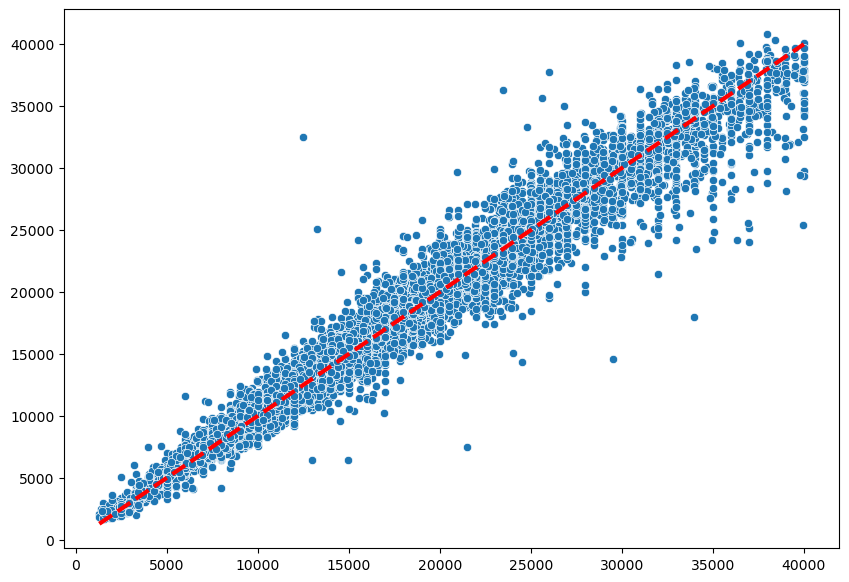

In [330]:
plt.figure(figsize=(10,7))

sns.scatterplot(x=y_test.values.ravel(),y=predictions_xgb) # created grafik model predictions 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3) 